### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from nltk.sentiment import SentimentIntensityAnalyzer  
from textblob import TextBlob
from wordcloud import WordCloud



%matplotlib inline

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Joyce\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Joyce\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Joyce\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Import Data 

In [2]:
amazon_sales = pd.read_csv('amazon.csv')

pd.set_option('display.max_columns', None)
amazon_sales.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [3]:
print('COLUMN NAMES:\n')
for col in amazon_sales.columns:
    print(col)
    
print('\nShape:\n', amazon_sales.shape)

COLUMN NAMES:

product_id
product_name
category
discounted_price
actual_price
discount_percentage
rating
rating_count
about_product
user_id
user_name
review_id
review_title
review_content
img_link
product_link

Shape:
 (1465, 16)


In [4]:
amazon_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [5]:
# Checking for NULL values
amazon_sales.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

The 'rating_count' column has 2 missing values. To be cleaned up later.

### Data Cleaning

##### Typecasting prices (discounted & actual) and discount percentages to Float Datatype

In [6]:
# Discounted Price
amazon_sales['discounted_price'] = amazon_sales['discounted_price'].str.replace("₹",'')
amazon_sales['discounted_price'] = amazon_sales['discounted_price'].str.replace(",",'')
amazon_sales['discounted_price'] = amazon_sales['discounted_price'].astype('float64')

# Actual Price
amazon_sales['actual_price'] = amazon_sales['actual_price'].str.replace("₹",'')
amazon_sales['actual_price'] = amazon_sales['actual_price'].str.replace(",",'')
amazon_sales['actual_price'] = amazon_sales['actual_price'].astype('float64')

# Discount Percentage
amazon_sales['discount_percentage'] = amazon_sales['discount_percentage'].str.replace('%','').astype('float64')
amazon_sales['discount_percentage'] = amazon_sales['discount_percentage'] / 100

##### Checking for abnormal value in rating column & removal of the abnormalities

In [7]:
amazon_sales.rating.unique()

array(['4.2', '4', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3', '3.6',
       '3.4', '3.8', '3.5', '4.6', '3.2', '5', '4.7', '3', '2.8', '3.1',
       '4.8', '2.3', '|', '2', '2.6', '2.9'], dtype=object)

'|' is a incorrect rating, so the row(s) containing that will be removed.

In [8]:
# Removal of row(s) containing '|' as rating
amazon_sales = amazon_sales[~amazon_sales['rating'].str.contains('\|')]

# Check if removal has been done properly
amazon_sales.rating.unique()

array(['4.2', '4', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3', '3.6',
       '3.4', '3.8', '3.5', '4.6', '3.2', '5', '4.7', '3', '2.8', '3.1',
       '4.8', '2.3', '2', '2.6', '2.9'], dtype=object)

##### Typecasting rating and rating counts to Float Datatype

In [9]:
# Rating
amazon_sales['rating'] = amazon_sales['rating'].astype('float64')

# Rating Count
amazon_sales['rating_count'] = amazon_sales['rating_count'].str.replace(',', '').astype('float64')

In [10]:
amazon_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1464 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1464 non-null   object 
 1   product_name         1464 non-null   object 
 2   category             1464 non-null   object 
 3   discounted_price     1464 non-null   float64
 4   actual_price         1464 non-null   float64
 5   discount_percentage  1464 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1462 non-null   float64
 8   about_product        1464 non-null   object 
 9   user_id              1464 non-null   object 
 10  user_name            1464 non-null   object 
 11  review_id            1464 non-null   object 
 12  review_title         1464 non-null   object 
 13  review_content       1464 non-null   object 
 14  img_link             1464 non-null   object 
 15  product_link         1464 non-null   o

##### Descriptive Statistics

In [11]:
amazon_sales.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1464.000000,1464.000000,1464.000000,1464.000000,1462.000000
mean,3126.011906,5447.002923,0.477131,4.096585,18307.376881
std,6946.625442,10878.270001,0.216274,0.291674,42766.096572
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,323.750000,800.000000,0.320000,4.000000,1191.500000
50%,799.000000,1650.000000,0.500000,4.100000,5179.000000
75%,1999.000000,4303.750000,0.630000,4.300000,17342.250000
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000


#### Cleaning up NULL values in 'rating_count' column (Approach: Replace with median value)

In [12]:
# Display rows with NULL 'rating_count'
amazon_sales[amazon_sales['rating_count'].isnull()].head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,0.80,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,0.75,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [13]:
amazon_sales['rating_count'] = amazon_sales.rating_count.fillna(value=amazon_sales['rating_count'].median())

The NULL values in 'rating_count' column have been replaced by median values because:
- Mean and Median values are significantly different, and the standard deviation is also large
- This suggests that the distribution of 'rating_count' is likely to be skewed / contain outliers
- Median is less sensitive to outliers and provide a more robust measure of central tendency in skewed distributions as compared to using mean

In [14]:
# Check if update has been done correctly
print(amazon_sales.rating_count.iloc[282])
print(amazon_sales.rating_count.iloc[324])

5179.0
5179.0


In [15]:
# Check if NULL values are all removed
amazon_sales.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

##### Checking for presence of duplicates 

In [16]:
amazon_sales.duplicated().any()

False

#### Data cleaning for text

In [17]:

def clean_text(text):
 
    text = text.lower()

    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    stop_words = set(stopwords.words('english'))
 
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

amazon_sales['review_content'] = amazon_sales['review_content'].apply(clean_text)


No Duplicates present, hence no removal needed.

##### Split Categories -> into Main_Category and Sub_Category  (last element of the categories list taken)

In [18]:
# Split categories into a list
category_split = amazon_sales['category'].str.split('|')

# Extract the first and last elements from the split categories
main_category = category_split.str[0]
sub_category = category_split.str[-1]

# Create a new DataFrame with the extracted categories
categories_df = pd.DataFrame({'Main_Category': main_category, 'Sub_Category': sub_category})

# Display the DataFrame
categories_df

,Main_Category,Sub_Category
0,Computers&Accessories,USBCables
1,Computers&Accessories,USBCables
2,Computers&Accessories,USBCables
3,Computers&Accessories,USBCables
4,Computers&Accessories,USBCables
...,...,...
1460,Home&Kitchen,WaterPurifierAccessories
1461,Home&Kitchen,Rice&PastaCookers
1462,Home&Kitchen,HeatConvectors
1463,Home&Kitchen,ExhaustFans


In [19]:
# Drop the original 'category' column
amazon_sales.drop(columns=['category'], inplace=True)

# Insert 'Main_Category' and 'Sub_Category' columns at the desired positions (3rd and 4th columns)
amazon_sales.insert(loc=2, column='Main_Category', value=main_category)
amazon_sales.insert(loc=3, column='Sub_Category', value=sub_category)

# Replace '&' with a space in main category names
amazon_sales['Main_Category'] = amazon_sales['Main_Category'].str.replace('&', ' & ')

# Display the updated DataFrame
amazon_sales.head()

,product_id,product_name,Main_Category,Sub_Category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers & Accessories,USBCables,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",looks durable charging fine toono complainscha...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers & Accessories,USBCables,199.0,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",ordered cable connect phone android auto car c...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers & Accessories,USBCables,199.0,1899.0,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...",quite durable sturdyhttpsmmediaamazoncomimages...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers & Accessories,USBCables,329.0,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...",good productlong wirecharges goodnicei bought ...,https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers & Accessories,USBCables,154.0,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...",bought instead original apple work 150rs fast ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


##### Creating Categories for Ratings

In [20]:
rating_category = []

# Setting categorical values for each rating band
for score in amazon_sales['rating']:
    if score < 2.0 : rating_category.append('Poor')
    elif score < 3.0 : rating_category.append('Below Average')
    elif score < 4.0 : rating_category.append('Average')
    elif score < 5.0 : rating_category.append('Above Average')
    elif score == 5.0 : rating_category.append('Excellent')

# Adding rating categories
amazon_sales['rating_category'] = rating_category
amazon_sales['rating_category'] = amazon_sales['rating_category'].astype('category')

amazon_sales.head()

,product_id,product_name,Main_Category,Sub_Category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,rating_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers & Accessories,USBCables,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",looks durable charging fine toono complainscha...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Above Average
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers & Accessories,USBCables,199.0,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",ordered cable connect phone android auto car c...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Above Average
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers & Accessories,USBCables,199.0,1899.0,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...",quite durable sturdyhttpsmmediaamazoncomimages...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Average
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers & Accessories,USBCables,329.0,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...",good productlong wirecharges goodnicei bought ...,https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Above Average
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers & Accessories,USBCables,154.0,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...",bought instead original apple work 150rs fast ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Above Average


##### Removing Unwanted Columns (about_product, user_name, img_link, product_link)

In [21]:
# Drop unwanted columns
amazon_sales.drop(columns=['about_product', 'user_name', 'img_link', 'product_link'], inplace=True)

amazon_sales.head()

,product_id,product_name,Main_Category,Sub_Category,discounted_price,actual_price,discount_percentage,rating,rating_count,user_id,review_id,review_title,review_content,rating_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers & Accessories,USBCables,399.0,1099.0,0.64,4.2,24269.0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",looks durable charging fine toono complainscha...,Above Average
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers & Accessories,USBCables,199.0,349.0,0.43,4.0,43994.0,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",ordered cable connect phone android auto car c...,Above Average
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers & Accessories,USBCables,199.0,1899.0,0.90,3.9,7928.0,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...",quite durable sturdyhttpsmmediaamazoncomimages...,Average
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers & Accessories,USBCables,329.0,699.0,0.53,4.2,94363.0,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...",good productlong wirecharges goodnicei bought ...,Above Average
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers & Accessories,USBCables,154.0,399.0,0.61,4.2,16905.0,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...",bought instead original apple work 150rs fast ...,Above Average


### Exploratory Data Analysis (EDA)

##### Correlation Matrix

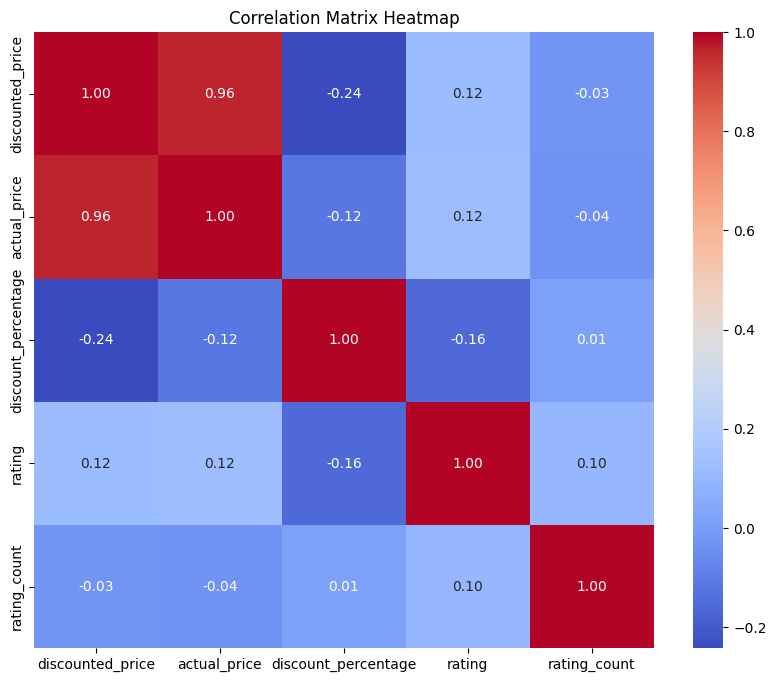

In [22]:
correlation_matrix = amazon_sales.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Bar Chart

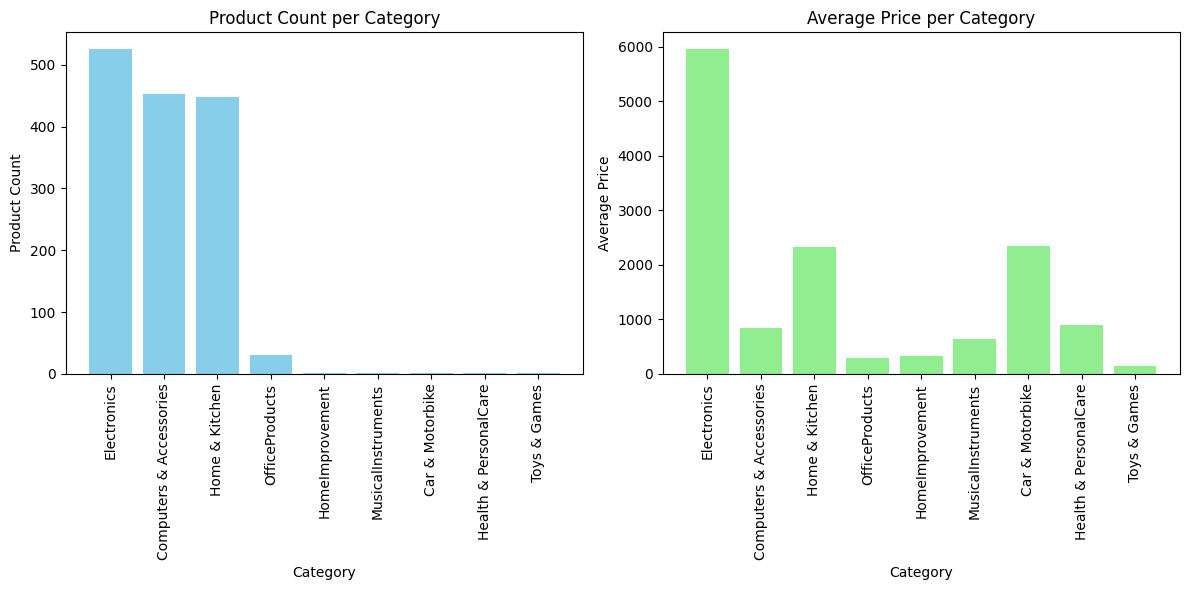

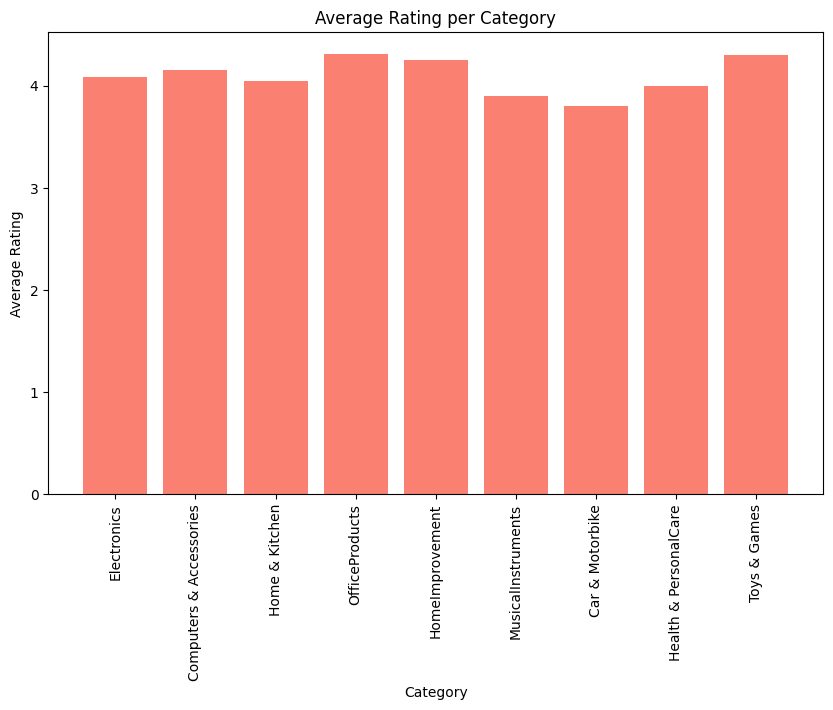

Category with highest average price: Electronics
Category with lowest average price: Toys & Games
Category with highest average rating: OfficeProducts
Category with lowest average rating: Car & Motorbike


In [23]:
# Calculate count, average price, and average rating for each category
category_stats = amazon_sales.groupby('Main_Category').agg({
    'product_id': 'count',
    'discounted_price': 'mean',
    'rating': 'mean'
}).reset_index()

# Sort categories by count of products
category_stats = category_stats.sort_values(by='product_id', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))

# Bar chart for product count per category
plt.subplot(1, 2, 1)
plt.bar(category_stats['Main_Category'], category_stats['product_id'], color='skyblue')
plt.title('Product Count per Category')
plt.xlabel('Category')
plt.ylabel('Product Count')
plt.xticks(rotation=90)

# Bar chart for average price per category
plt.subplot(1, 2, 2)
plt.bar(category_stats['Main_Category'], category_stats['discounted_price'], color='lightgreen')
plt.title('Average Price per Category')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Plotting average rating per category
plt.figure(figsize=(10, 6))
plt.bar(category_stats['Main_Category'], category_stats['rating'], color='salmon')
plt.title('Average Rating per Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

# Find category with highest and lowest average prices and ratings
highest_avg_price_category = category_stats.loc[category_stats['discounted_price'].idxmax()]
lowest_avg_price_category = category_stats.loc[category_stats['discounted_price'].idxmin()]

highest_avg_rating_category = category_stats.loc[category_stats['rating'].idxmax()]
lowest_avg_rating_category = category_stats.loc[category_stats['rating'].idxmin()]

print("Category with highest average price:", highest_avg_price_category['Main_Category'])
print("Category with lowest average price:", lowest_avg_price_category['Main_Category'])

print("Category with highest average rating:", highest_avg_rating_category['Main_Category'])
print("Category with lowest average rating:", lowest_avg_rating_category['Main_Category'])


#### Boxplot

Distrubution of discount pecentages by category <br>

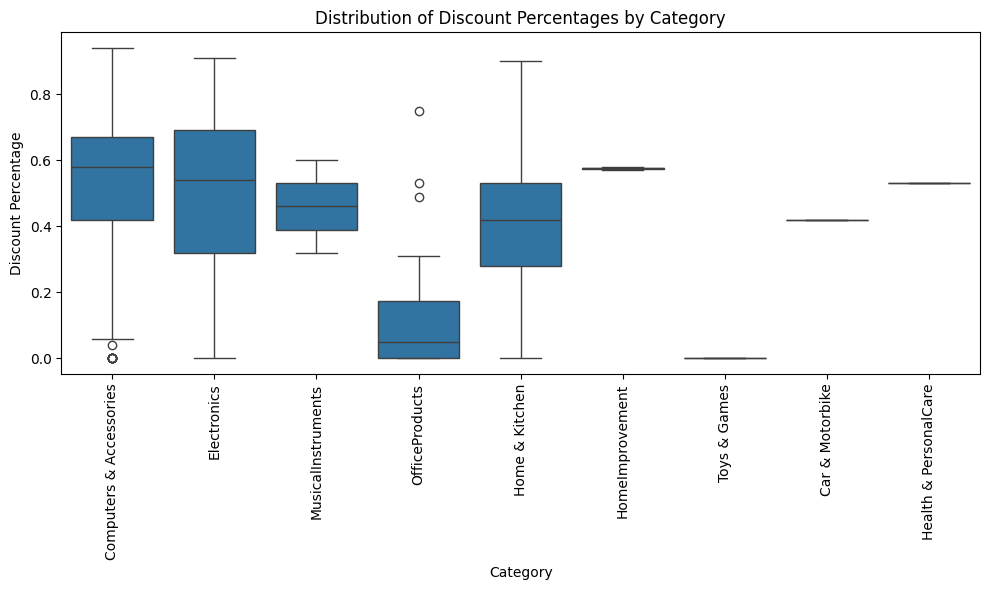

Statistics for Discount Percentage by Category:
                             Mean  Median   Min   Max
Main_Category                                        
Car & Motorbike          0.420000   0.420  0.42  0.42
Computers & Accessories  0.540243   0.580  0.00  0.94
Electronics              0.508289   0.540  0.00  0.91
Health & PersonalCare    0.530000   0.530  0.53  0.53
Home & Kitchen           0.401745   0.420  0.00  0.90
HomeImprovement          0.575000   0.575  0.57  0.58
MusicalInstruments       0.460000   0.460  0.32  0.60
OfficeProducts           0.123548   0.050  0.00  0.75
Toys & Games             0.000000   0.000  0.00  0.00


In [24]:
# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(data=amazon_sales, x=amazon_sales['Main_Category'], y=amazon_sales['discount_percentage'])
plt.title('Distribution of Discount Percentages by Category')
plt.xlabel('Category')
plt.ylabel('Discount Percentage')
plt.xticks(rotation=90)  # Rotate category labels for better readability
plt.tight_layout()
plt.show()

# Calculate statistics for each category
category_stats = amazon_sales.groupby('Main_Category')['discount_percentage'].describe()[['mean', '50%', 'min', 'max']]
category_stats.columns = ['Mean', 'Median', 'Min', 'Max']

# Print statistics
print("Statistics for Discount Percentage by Category:")
print(category_stats)

Distrubution of Rating by Category

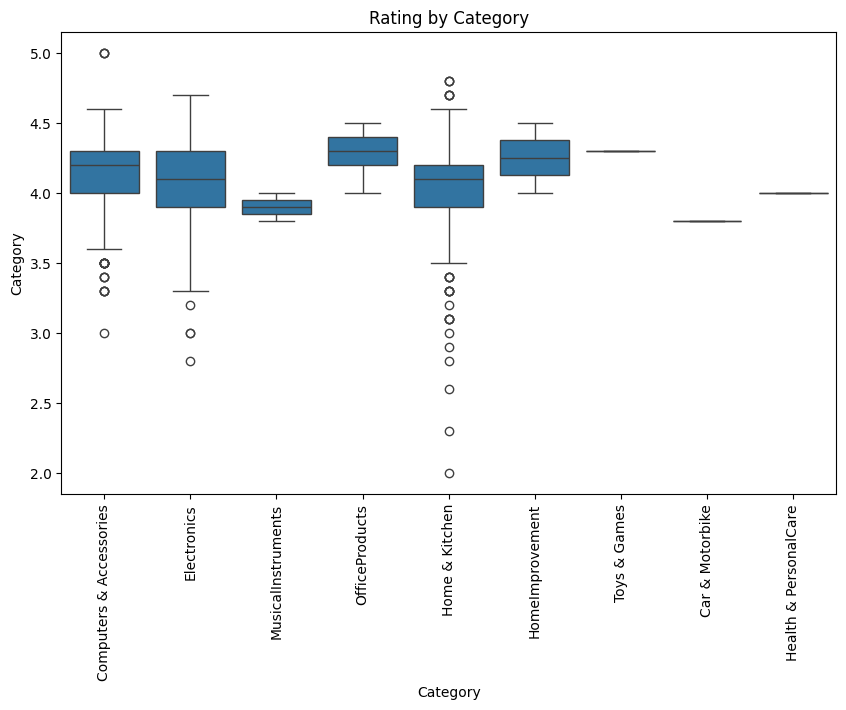

Statistics for Ratings by Category:
                             Mean  Median  Min  Max
Main_Category                                      
Car & Motorbike          3.800000    3.80  3.8  3.8
Computers & Accessories  4.154967    4.20  3.0  5.0
Electronics              4.081749    4.10  2.8  4.7
Health & PersonalCare    4.000000    4.00  4.0  4.0
Home & Kitchen           4.040716    4.10  2.0  4.8
HomeImprovement          4.250000    4.25  4.0  4.5
MusicalInstruments       3.900000    3.90  3.8  4.0
OfficeProducts           4.309677    4.30  4.0  4.5
Toys & Games             4.300000    4.30  4.3  4.3


In [25]:
# Plotting
plt.figure(figsize=(10, 6))

# Boxplot for Ratings by Category
sns.boxplot(data=amazon_sales, x=amazon_sales['Main_Category'], y=amazon_sales['rating'])
plt.title('Rating by Category')
plt.xlabel('Category')
plt.ylabel('Category')
plt.xticks(rotation=90)

plt.show()

# Calculate statistics for each category
category_stats = amazon_sales.groupby('Main_Category')['rating'].describe()[['mean', '50%', 'min', 'max']]
category_stats.columns = ['Mean', 'Median', 'Min', 'Max']

# Print statistics
print("Statistics for Ratings by Category:")
print(category_stats)




#### Best and least selling product

In [26]:
# Calculate best-selling product
best_selling_product = amazon_sales.groupby('product_name')['rating_count'].sum().idxmax()

# Calculate best-rated product
best_rated_product = amazon_sales.groupby('product_name')['rating'].mean().idxmax()


# Calculate least-selling product
least_selling_product = amazon_sales.groupby('product_name')['rating_count'].sum().idxmin()

# Calculate least-rated product
least_rated_product = amazon_sales.groupby('product_name')['rating'].mean().idxmin()

# Find the item with the highest discount percentage
highest_discounted_item = amazon_sales.loc[amazon_sales['discount_percentage'].idxmax()]


# Create a new DataFrame
metrics_df = pd.DataFrame({
    "Metric": ["Best Selling Product", "Best Rated Product", "Least Selling Product", "Least Rated Product", "Highest Discounted Item"],
    "Product": [best_selling_product, best_rated_product, least_selling_product, least_rated_product, highest_discounted_item['product_name']]
})

# Display the DataFrame
metrics_df.head()

,Metric,Product
0,Best Selling Product,AmazonBasics Flexible Premium HDMI Cable (Blac...
1,Best Rated Product,Amazon Basics Wireless Mouse | 2.4 GHz Connect...
2,Least Selling Product,Khaitan ORFin Fan heater for Home and kitchen-...
3,Least Rated Product,Khaitan ORFin Fan heater for Home and kitchen-...
4,Highest Discounted Item,"rts [2 Pack] Mini USB C Type C Adapter Plug, T..."


#### Scatter Plot

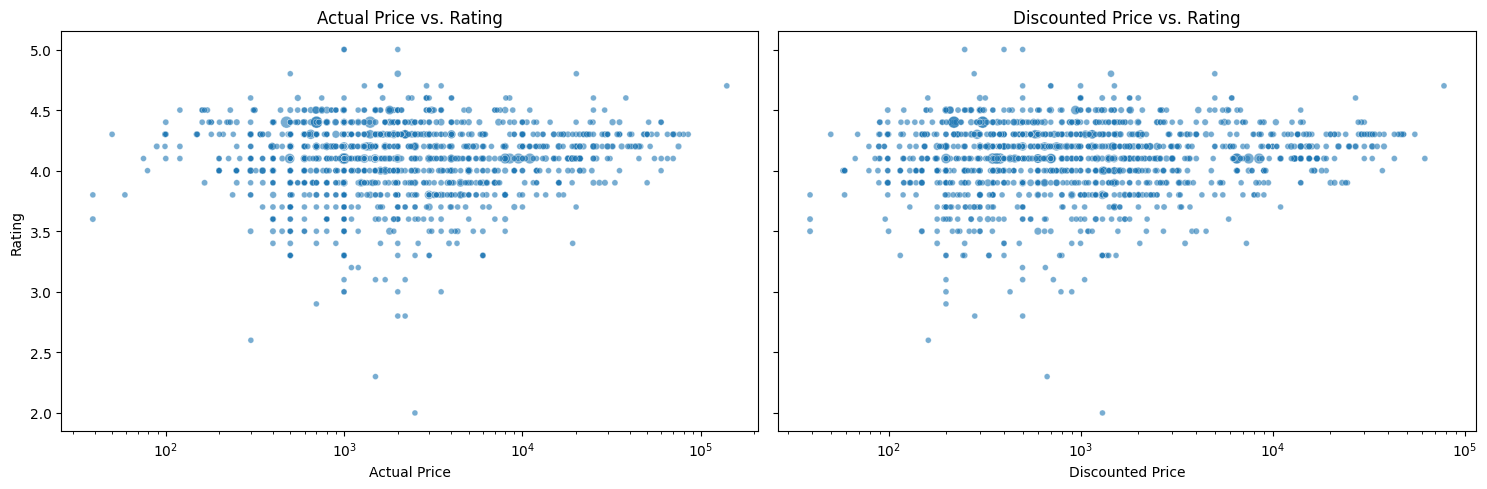

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15,5))

actual_prices = amazon_sales['actual_price']
discount_prices = amazon_sales['discounted_price']
ratings = amazon_sales['rating']

# Create scatter plot actual price vs rating
sns.scatterplot(x=actual_prices, y=ratings, size=amazon_sales['rating_count'], legend=False, alpha=0.6, ax=ax1)
ax1.set_xlabel('Actual Price')
ax1.set_ylabel('Rating')
ax1.set_title('Actual Price vs. Rating')
ax1.set_xscale('log')


# Create scatter plot discounted price vs rating
sns.scatterplot(x=discount_prices, y=ratings, size=amazon_sales['rating_count'], legend=False, alpha=0.6, ax=ax2)
ax2.set_xlabel('Discounted Price')
ax2.set_ylabel('Rating')
ax2.set_title('Discounted Price vs. Rating')
ax2.set_xscale('log')


plt.tight_layout()
plt.show()


#### Linear Regression

Rating to predict each item purchase count, the higher predicted purchase count can be recommended

In [28]:
# Count the purchases of each product using the 'product_id' column
purchase_counts = amazon_sales['product_name'].value_counts().reset_index()
purchase_counts.columns = ['product_name', 'purchase_count']

# Merge purchase counts with amazon_sales
amazon_sales = pd.merge(amazon_sales, purchase_counts)


# Calculate the average rating for each product
average_ratings = amazon_sales.groupby('product_name')['rating'].mean().reset_index()
average_ratings.columns = ['product_name', 'average_rating']

# Merge purchase counts with amazon_sales
amazon_sales = pd.merge(amazon_sales, average_ratings)



amazon_sales.head()


,product_id,product_name,Main_Category,Sub_Category,discounted_price,actual_price,discount_percentage,rating,rating_count,user_id,review_id,review_title,review_content,rating_category,purchase_count,average_rating
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers & Accessories,USBCables,399.0,1099.0,0.64,4.2,24269.0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",looks durable charging fine toono complainscha...,Above Average,3,4.2
1,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers & Accessories,USBCables,399.0,1099.0,0.64,4.2,24270.0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",looks durable charging fine toono complainscha...,Above Average,3,4.2
2,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers & Accessories,USBCables,399.0,1099.0,0.64,4.2,24269.0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",looks durable charging fine toono complainscha...,Above Average,3,4.2
3,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers & Accessories,USBCables,199.0,349.0,0.43,4.0,43994.0,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",ordered cable connect phone android auto car c...,Above Average,3,4.0
4,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers & Accessories,USBCables,199.0,349.0,0.43,4.0,43993.0,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",ordered cable connect phone android auto car c...,Above Average,3,4.0


Intercept of Regression 	: b =  [0.42232727]
Coefficients of Regression 	: a =  [[0.1976891]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.00873012678446572
Mean Squared Error (MSE) 	: 0.35550177654713105

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.00571847523608926
Mean Squared Error (MSE) 	: 0.25278102767120464



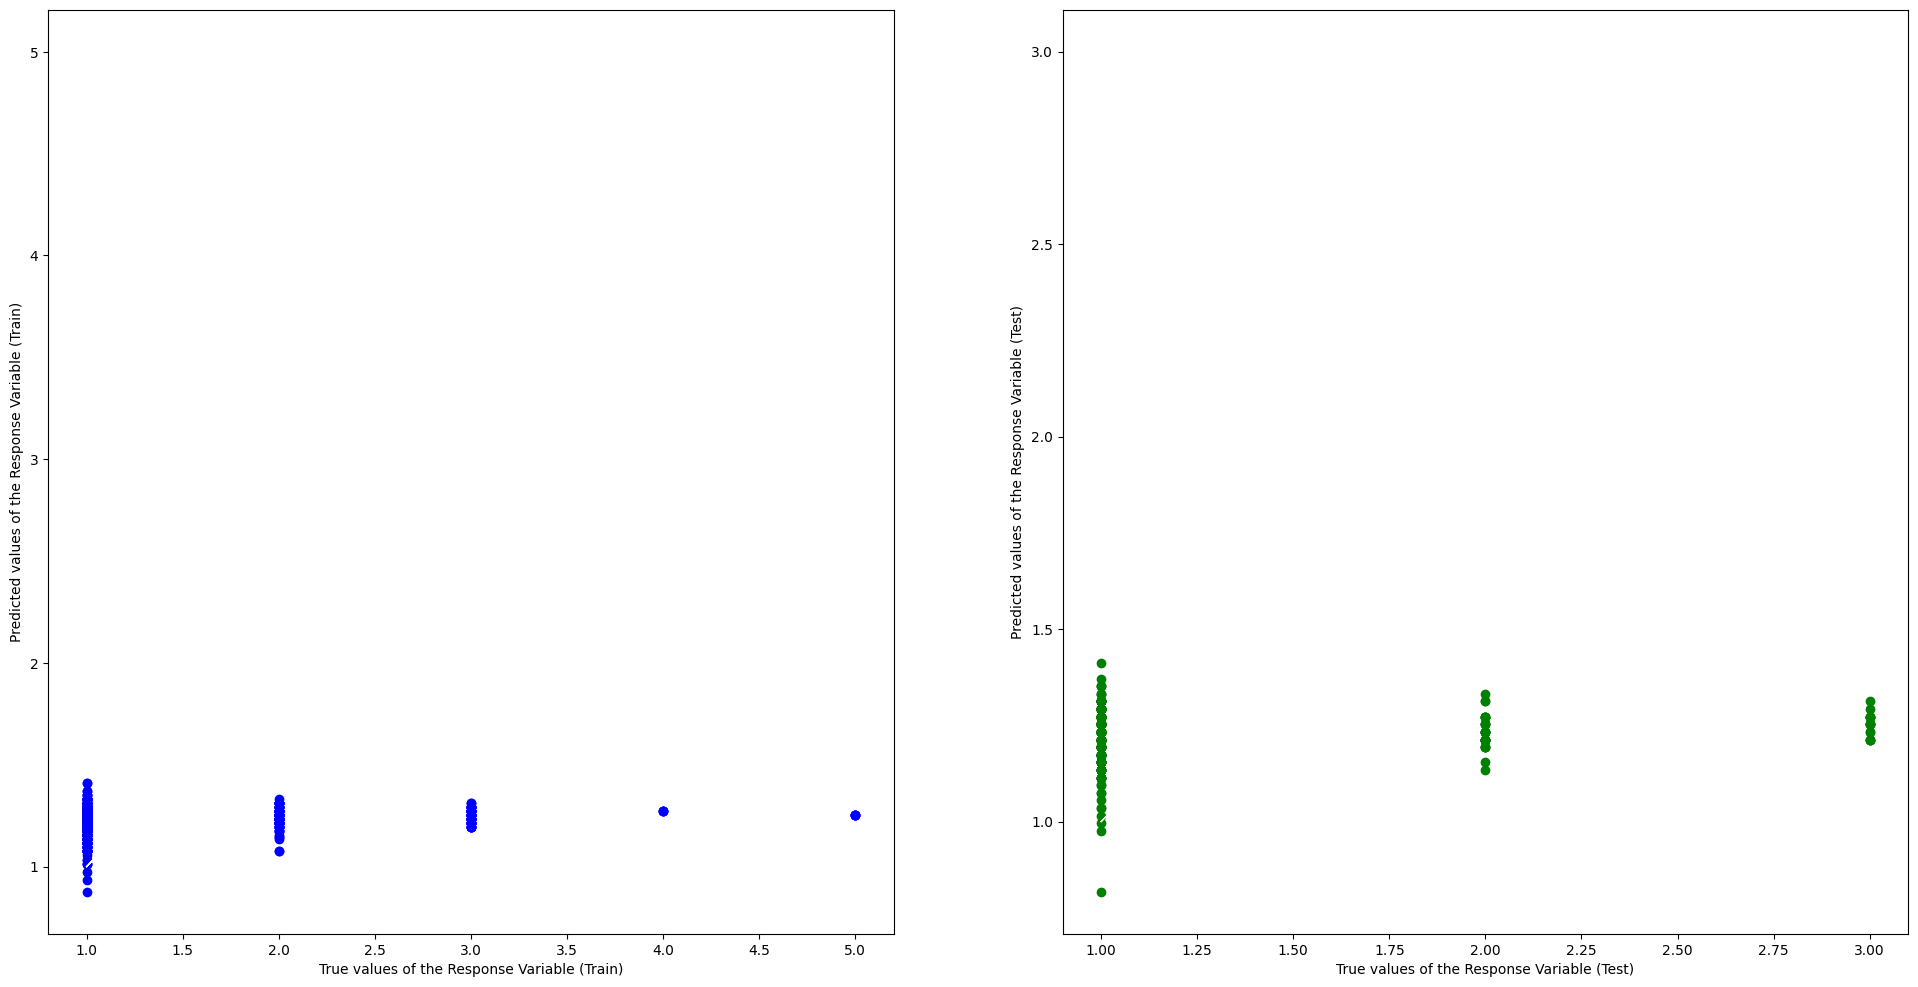

In [29]:
# Select features (independent variables) and target (dependent variable)
X = amazon_sales[['average_rating']]  # Independent variable: average_rating
y = amazon_sales[['purchase_count']]   # Dependent variable: purchase count

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### Sentimental Analysis

Analysis of reviews and main category

Main_Category            sentiment
Car & Motorbike          Positive     1.000000
Computers & Accessories  Positive     0.984547
                         Negative     0.011038
                         Neutral      0.004415
Electronics              Positive     0.975285
                         Negative     0.024715
Health & PersonalCare    Positive     1.000000
Home & Kitchen           Positive     0.964206
                         Negative     0.033557
                         Neutral      0.002237
HomeImprovement          Positive     1.000000
MusicalInstruments       Positive     1.000000
OfficeProducts           Positive     0.935484
                         Negative     0.032258
                         Neutral      0.032258
Toys & Games             Positive     1.000000
Name: sentiment, dtype: float64


<Figure size 1000x600 with 0 Axes>

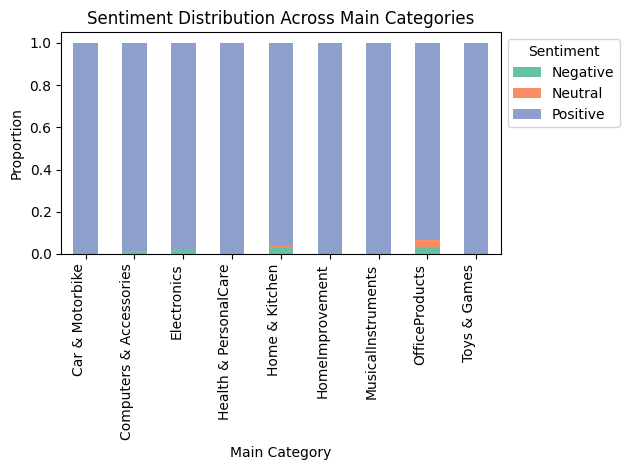

In [30]:
# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment_score(review):
    sentiment_score = sia.polarity_scores(review)
    return sentiment_score['compound']

# Apply sentiment analysis to each review
amazon_sales['sentiment_score'] = amazon_sales['review_content'].apply(get_sentiment_score)

# Classify sentiment based on score
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment classification
amazon_sales['sentiment'] = amazon_sales['sentiment_score'].apply(classify_sentiment)

# Visualize sentiment distribution
sentiment_distribution = amazon_sales.groupby('Main_Category')['sentiment'].value_counts(normalize=True)

print(sentiment_distribution)


# Define a palette using seaborn
palette = sns.color_palette("Set2", len(sentiment_distribution))

# Plot sentiment distribution across main categories
plt.figure(figsize=(10, 6))
sentiment_distribution.unstack().plot(kind='bar', stacked=True, color=palette)
plt.title('Sentiment Distribution Across Main Categories')
plt.xlabel('Main Category')
plt.ylabel('Proportion')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Sentiment', loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside
plt.tight_layout()
plt.show()



Analysis of reviews and Product

product_name                                                                                                                                                                                              sentiment
!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!                                                                                                                      Positive     1.0
!!HANEUL!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!Thermoset!!                                                                                                   Positive     1.0
10WeRun Id-116 Bluetooth Smartwatch Wireless Fitness Band for Boys, Girls, Men, Women & Kids | Sports Gym Watch for All Smart Phones I Heart Rate and spo2 Monitor                                        Positive     1.0
10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ultra High Speed HDMI 2.1 Cable 4k 120Hz 144Hz 2k 165Hz 8k 60Hz Dynamic HDR ARC eARC DTS

C:\Users\Joyce\AppData\Local\Temp\ipykernel_3984\3803245679.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


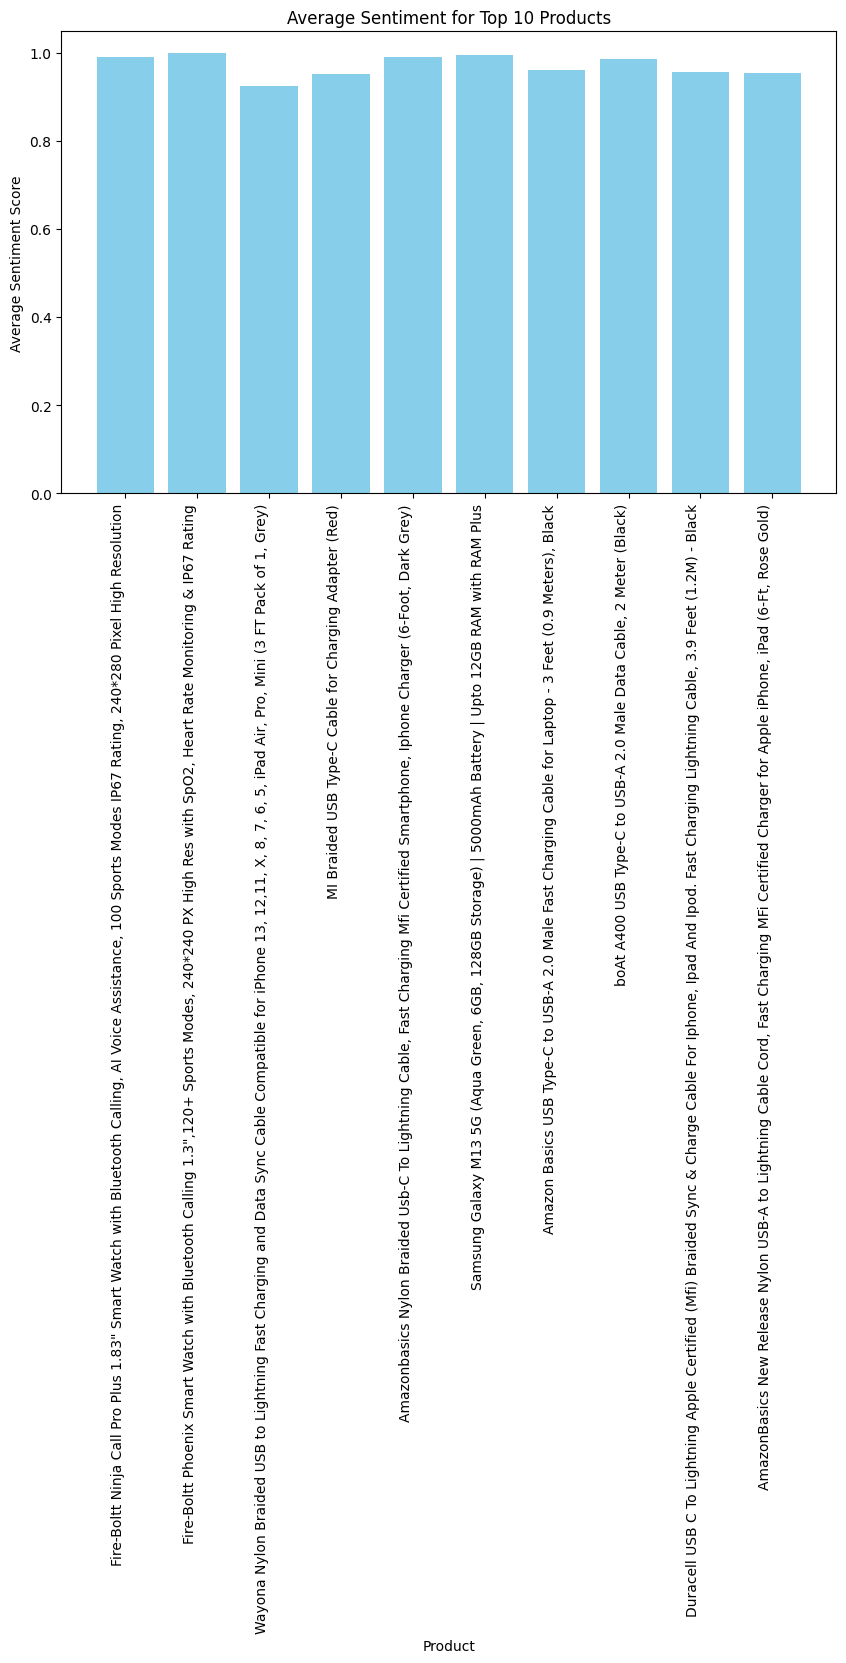

In [31]:
# Visualize sentiment distribution
sentiment_distribution2 = amazon_sales.groupby('product_name')['sentiment'].value_counts(normalize=True)

print(sentiment_distribution2)

# Group by product name and sentiment, and calculate the proportion
sentiment_distribution2 = amazon_sales.groupby(['product_name', 'sentiment']).size().unstack(fill_value=0)
sentiment_distribution2 = sentiment_distribution2.div(sentiment_distribution2.sum(axis=1), axis=0)

# Calculate average sentiment for the top 10 products
top_10_average_sentiments = {}
# Plot sentiment distribution across specific product names (top 10)
top_products = amazon_sales['product_name'].value_counts().nlargest(10).index
for product in top_products:
    product_sentiment_scores = amazon_sales.loc[amazon_sales['product_name'] == product, 'sentiment_score']
    average_sentiment = product_sentiment_scores.mean()
    top_10_average_sentiments[product] = average_sentiment

# Plot average sentiment for the top 10 products
plt.figure(figsize=(10, 6))
plt.bar(top_10_average_sentiments.keys(), top_10_average_sentiments.values(), color='skyblue')
plt.title('Average Sentiment for Top 10 Products')
plt.xlabel('Product')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


Word Cloud

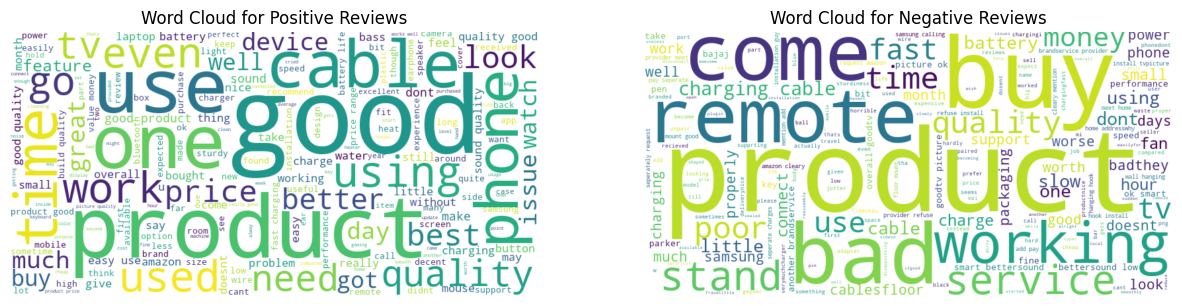

Product with the most positive reviews: Technotech High Speed HDMI Cable 5 Meter V1.4 - Supports Full HD 1080p (Color May Vary)


In [33]:


amazon_sales['sentiment'] = amazon_sales['review_content'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Separate positive and negative reviews
positive_reviews = ' '.join(amazon_sales[amazon_sales['sentiment'] > 0]['review_content'])
negative_reviews = ' '.join(amazon_sales[amazon_sales['sentiment'] < 0]['review_content'])

# Generate word clouds for positive and negative reviews
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Display word clouds
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')

plt.show()

# Identify the product with the most positive reviews
most_positive_product = amazon_sales.groupby('product_name')['sentiment'].mean().idxmax()
print("Product with the most positive reviews:", most_positive_product)